Kecepatan Kipas: 84.44%


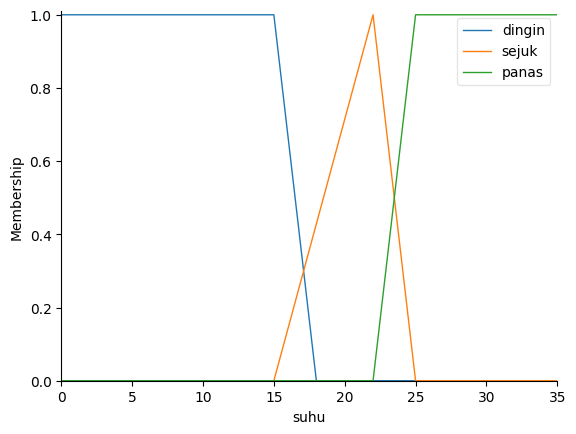

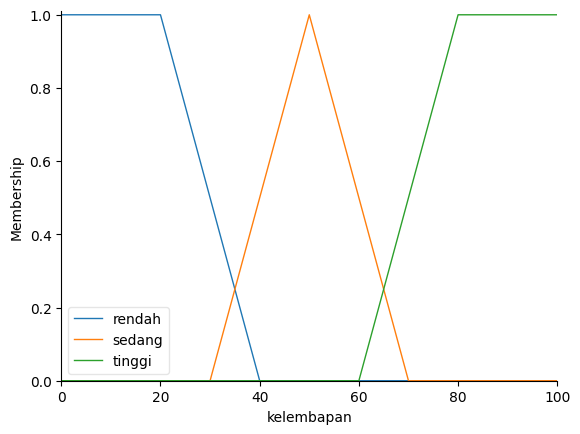

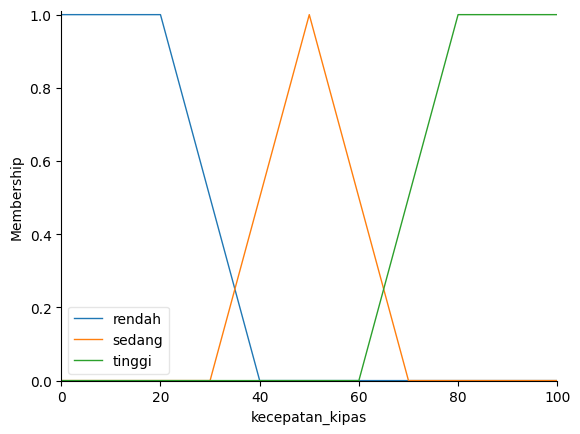

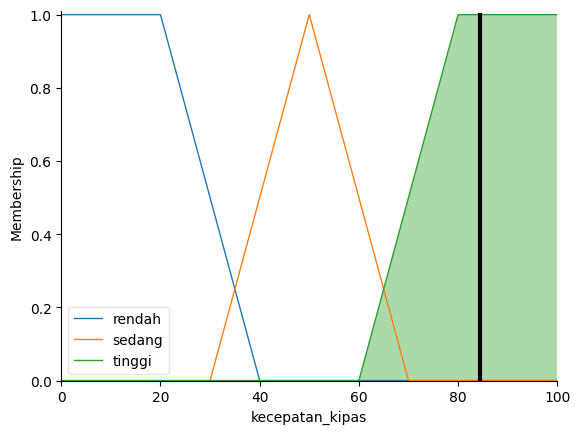

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel Input (antecedents)
suhu = ctrl.Antecedent(np.arange(0, 36, 1), 'suhu')  # Suhu dalam derajat Celcius
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembapan')  # Kelembapan dalam persen

# Variabel Output (consequent)
kecepatan_kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kecepatan_kipas')  # Kecepatan kipas dalam persen

# Membership Functions untuk Suhu
suhu['dingin'] = fuzz.trapmf(suhu.universe, [0, 0, 15, 18])
suhu['sejuk'] = fuzz.trimf(suhu.universe, [15, 22, 25])
suhu['panas'] = fuzz.trapmf(suhu.universe, [22, 25, 35, 35])

# Membership Functions untuk Kelembapan
kelembapan['rendah'] = fuzz.trapmf(kelembapan.universe, [0, 0, 20, 40])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [30, 50, 70])
kelembapan['tinggi'] = fuzz.trapmf(kelembapan.universe, [60, 80, 100, 100])

# Membership Functions untuk Kecepatan Kipas
kecepatan_kipas['rendah'] = fuzz.trapmf(kecepatan_kipas.universe, [0, 0, 20, 40])
kecepatan_kipas['sedang'] = fuzz.trimf(kecepatan_kipas.universe, [30, 50, 70])
kecepatan_kipas['tinggi'] = fuzz.trapmf(kecepatan_kipas.universe, [60, 80, 100, 100])

# Aturan Fuzzy (Rules)
rules = [
    ctrl.Rule(suhu['dingin'] & kelembapan['rendah'], kecepatan_kipas['rendah']),
    ctrl.Rule(suhu['dingin'] & kelembapan['sedang'], kecepatan_kipas['rendah']),
    ctrl.Rule(suhu['sejuk'] & kelembapan['rendah'], kecepatan_kipas['sedang']),
    ctrl.Rule(suhu['sejuk'] & kelembapan['sedang'], kecepatan_kipas['sedang']),
    ctrl.Rule(suhu['panas'] | kelembapan['tinggi'], kecepatan_kipas['tinggi']),
    ctrl.Rule(suhu['sejuk'] & kelembapan['tinggi'], kecepatan_kipas['tinggi']),
]

# Sistem Kontrol Fuzzy
kipas_ctrl = ctrl.ControlSystem(rules)
kipas_simulasi = ctrl.ControlSystemSimulation(kipas_ctrl)

# Input Nilai
kipas_simulasi.input['suhu'] = 28  # Suhu dalam derajat Celcius
kipas_simulasi.input['kelembapan'] = 75  # Kelembapan dalam persen

# Proses Inferensi
kipas_simulasi.compute()

# Output
print(f"Kecepatan Kipas: {kipas_simulasi.output['kecepatan_kipas']:.2f}%")

# Visualisasi Membership Functions
suhu.view()
kelembapan.view()
kecepatan_kipas.view()

# Visualisasi Hasil
kecepatan_kipas.view(sim=kipas_simulasi)

plt.show()
